# Fys1120 Lab

Oskar Idland, Andreas  Johansern og Hishem Kløvnes 

(Gruppene bestemmes under selve labøkten, så alle bør forberede sin egen notebook på forhånd. Du kan gjerne avtale å jobbe sammen med noen på forhånd, gitt at de skal ha samme labøkt. Gruppene skal bestå av 2-3 personer.)

Denne notebooken skal fylles ut som del av lab i Fys1120, og skal godkjennes av labassistenten ved slutten av labøkten. Før dere går på lab må dere forberede notebooken for å ha tid nok til å bli ferdig med selve labøvelsene. Alle oppgavene (både de som skal gjøres før og under lab) er beskrevet i full detalj i labteksten. Her i notebooken skal dere besvare de prelab oppgavene (indikert av undertitlene) der dere blir bedt om å skrive et python skript . Dette skal gjøre noen av oppgavene som dere skal utføre under selve laben mye enklere.  

Resten av oppgavene trenger dere ikke forberede i notebooken før lab, **men** oppgavene i labteksten som er merket med *På lab* bør dere besvare i notebooken når dere er på lab, for at alle svarene skal være samlet. De oppgavene som er merket *Før lab* bør dere også prøve å løse (for dere selv) før lab, for at dere skal kunne bruke tiden på å løse andre eventuelle utfordringer under selve labøvelsen. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Oppgave 1
### Oppgave 1.1.1
$$
    U = U_0 e^{-t/\tau}
$$
$$
\ln U = \ln U_0 - t/\tau
$$
$$
y = \ln U, \quad a = - 1/\tau, \quad b = \ln U_0
$$
$$
R = \frac{\tau}{\mathcal{C}} = - 1/(a\mathcal{C})
$$

### Oppgaver 1.1.2 (før lab)

I neste celle finner du en variabel $C$, en vektor $U$ og en vektor $t$, som forestiller "falske" verdier for kapasitansen, spenningene og tidene som du vil måle i forsøket. Bruk disse til å finne en tilsvarende "falsk" verdi av restistansen $R$, som beskrevet i labteksten. Plot også målepunktene og de tilpassede kurvene på både eksponentiell og på lineær form (plottene skal ligne på bildene). Tips: søk opp funksjonen `scipy.stats.lingress` på google!

Husk å ha med aksebetegnelser og tegnforklaring! (Tips: du kan bruke Latex-syntax i matplotlib, f.eks. skriv ``plt.xlabel("$\\ln \\frac{U}{U_0} $") `` for å få aksebetegnelsen på y-aksen i venstre plott).


<table><tr>
<td> <img src="https://www.mn.uio.no/fysikk/personer/vit/gertwk/eksempelgraf_lin_1.png" alt="Målinger på lineær form" width="400"/> </td>
<td> <img src="https://www.mn.uio.no/fysikk/personer/vit/gertwk/eksempelgraf_exp_1.png" alt="Målinger på eksponentiell form" width="400"/> </td>
</tr></table>

Når du er på lab er alt du trenger å gjøre her å endre $C$, $t$, og $U$ til de "ekte verdiene", dvs. verdiene av kapasitans, tid og spenning som du har funnet under forsøket! **Merk:** disse verdiene vil muligens se veldig forskjellig ut fra "dummy"-verdiene dere bruker før lab. Dummy-verdiene har gjerne også feil antall desimaler, i forhold til nøyaktigheten dere vil måle størrelsene med under lab-øvelsen. 

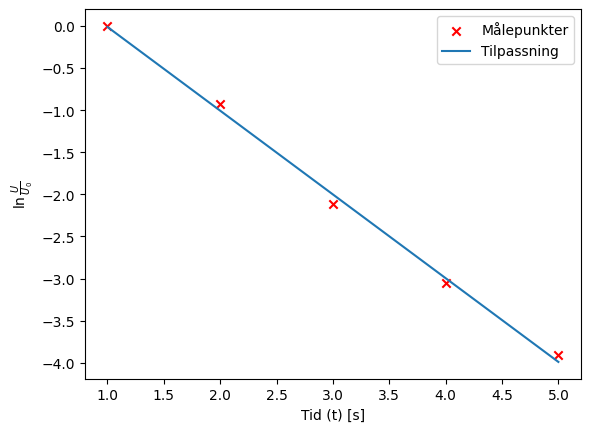

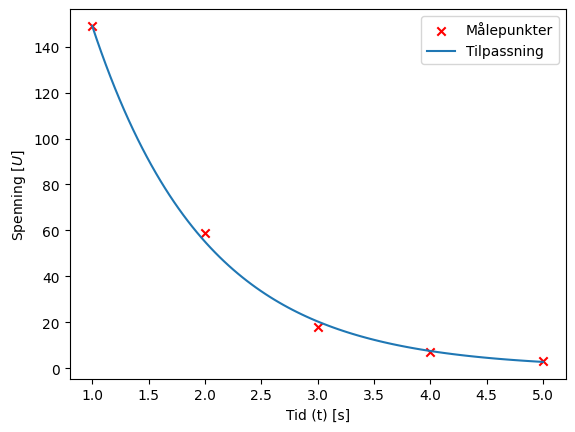


Motstand R = 0.1006 Ohm


In [2]:
C = 10                              #Coulomp per Volt
t = np.array([1, 2, 3, 4, 5])       #Sekunder
U = np.array([149, 59, 18, 7, 3])   #Volt


def res1(C, t, U):       
    y = np.log(U/U[0])
    results = linregress(t, y)
    a = results.slope
    b = results.intercept
    R = -1/(a*C)

    plt.scatter(t, y, label = "Målepunkter", color = 'red', marker = 'x')
    plt.plot(t, a*t + b , label = 'Tilpassning')
    plt.xlabel('Tid (t) [s]')
    plt.ylabel(r'$\ln \frac{U}{U_0}$')  
    plt.legend()
    plt.show()

    tau = -1/a
    plt.scatter(t, U, color = 'red', marker = 'x', label = "Målepunkter")
    t = np.linspace(0, t[-2], 100)
    y = U[0]*np.exp(-t/tau) 
    plt.plot(t+1, y, label = 'Tilpassning') # Legger til 1 til t-arrayen så grafene liner opp 
    plt.xlabel('Tid (t) [s]')
    plt.ylabel(r'Spenning $[U]$') 
    plt.legend()
    plt.show()
    print()
    print(f"Motstand R = {R:.4f} Ohm") 
    
res1(C, t, U)


### Oppgave 1.2.1
4, 5. 
Strømmen går ut nesten ummiddelbart etter kortslutning og den lades opp nesten ummiddelbart etter å bli koblet til strømkilden.   


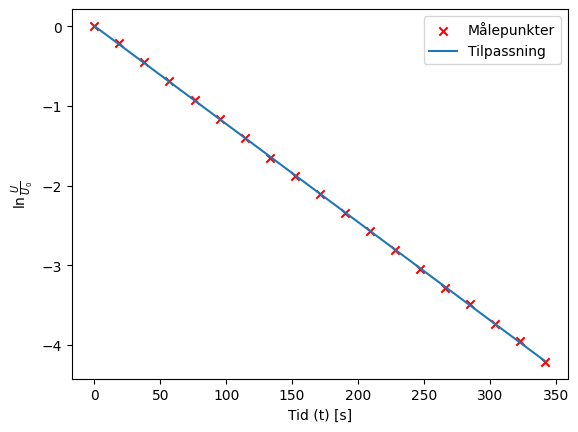

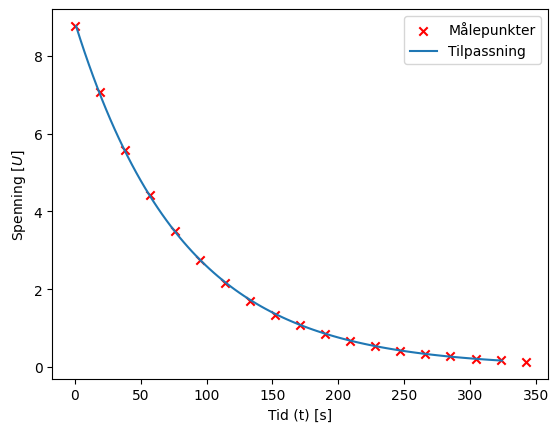


Motstand R = 9787848.3188 Ohm


In [3]:
U = np.array([8.77, 7.08, 5.59, 4.41, 3.49, 2.75, 2.16, 1.69, 1.34, 1.07, 0.84, 0.67, .53, .42, .33, .27, .21, .17, .13])
t = np.arange(0,6*60, len(U))
C = 8.3 * 1E-6
res1(C, t, U)

## Oppgaver 2.1.1 (før lab) og 2.2.1 (under lab)

I cellen under finner du en vektor $I$ og en vektor $U$, som er dummy-verdier for strømmen gjennom og spenningen over amperemeteret som vi skal måle på laben. Bruk disse verdiene til å lage en lineær tilpasning, og til å finne en dummy-verdi for den indre motstanden i amperemeteret, $R_{\mathrm{a}}$. Lag et plot som inneholder både verdiene av $I$ og $U$ samt den tilpassede kurven (noe liknende som figuren under).  

Når du er på laben (og gjør oppg. 2.2.1) skal alt du trenger å gjøre i notebooken være å sette inn de målte verdiene for strøm og spenning i vektorene $I$ og $U$.

<img src="https://www.mn.uio.no/fysikk/personer/vit/gertwk/eksempelgraf_2.png" alt="Målinger og lineær tilpasning" width="400">


In [4]:
I = np.array([6.4, 4.8, 3.9, 3.2, 2.0, 0.7]) # Ampere
U2 = np.array([3, 2.5, 2, 1.5, 1, 0.5])      # Volt      # Skriver U2, for å skille vektoren fra U i oppgave 1

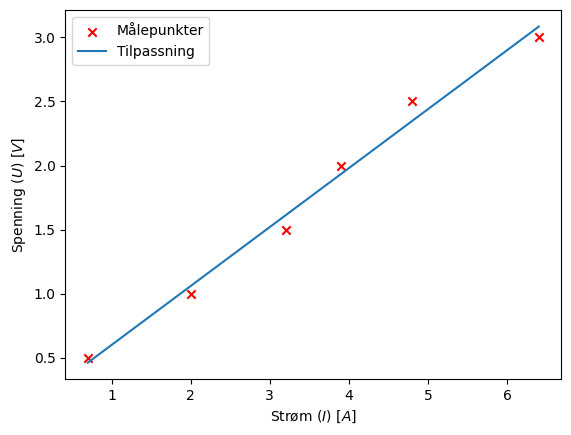


Motstand Ra = 0.46 Ohm


In [5]:
def res2(I, U2):
    plt.scatter(I, U2, color = 'red', marker = 'x', label = "Målepunkter")
    res = linregress(I, U2)
    a = res.slope  
    b = res.intercept
    plt.plot(I, a*I + b, label = 'Tilpassning')
    plt.xlabel('Strøm $(I)\ [A]$')
    plt.ylabel(r'Spenning $(U)\ [V]$') 
    plt.legend()
    plt.show()
    Ra = a
    print()
    print(f"Motstand Ra = {Ra:.2f} Ohm")  # Velg et passende antall desimaler!

    # Skriv din kode her
    # Siste celle skal skrive ut Ra 

res2(I, U2)

### Oppgave 2.2.1

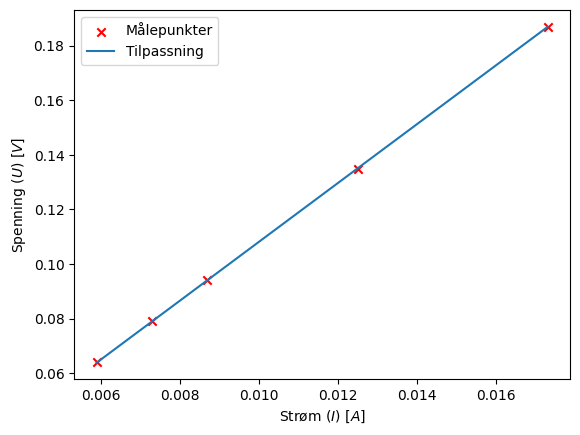


Motstand Ra = 10.79 Ohm


In [6]:
I = np.array([5.9, 7.3, 8.7, 12.5, 17.3])*1E-3
U = np.array([64, 79, 94,135, 187])*1E-3
res2(I, U)

## Oppgave 3.1.1

$$
U = \varepsilon - Ir 
$$
Hvis vi plotter U mot I vil vi kunne bruke stigningstallet og konstantleddet for å finnne -R og emf

## Oppgaver 3.1.2 (før lab) og 3.2.2 (under lab)

I cellen under finner dere to lister med spenninger $U$ og motstander $R$, som dere kommer til å måle under forsøket. Verdiene som er der nå er "falske".

Man kan bruke disse verdiene for å lage en liste med verdier for strømmen $I$. Når dere har strømmen kan dere bestemme indre resistans $r$ og emf $\epsilon$ ved hjelp av en linærtilpasning, slik dere gjorde i de to tidligere oppgavene. Mer om dette står forklart i labteksten.

<img src="https://www.mn.uio.no/fysikk/personer/vit/gertwk/eksempelgraf_3.png" alt="Lineær tilpasning av spenning målt mot strøm for et peltier-element med en indre resistans" width="400"/> 

Ved å lage en linærtilpasning skal dere få en graf (gitt dere bruker samme dummy-verdier) som ligner den over, og bruke denne til å anslå verdier for emf, og indre motstand. 

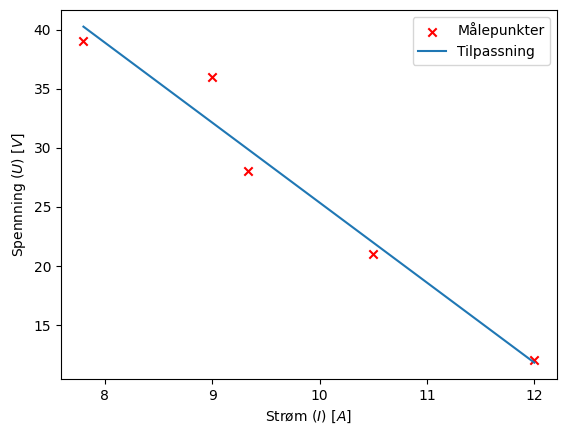


Motstand r = 6.77 Ohm
Motstand emf = 93.05 V


In [7]:
U3 = np.array([12, 21, 28, 36, 39])   # Volt
R3 = np.array([1, 2, 3, 4, 5])        # Ohm

def res3(R3, U3):   
    I3 = U3/R3          # Strømmen I, som dere må finne. 
    plt.scatter(I3, U3, color = 'red', marker = 'x', label = "Målepunkter")   
    res = linregress(I3, U3)
    a = res.slope   
    b = res.intercept
    plt.plot(I3, a*I3 + b, label = "Tilpassning")
    plt.xlabel(r'Strøm $(I)\ [A]$')
    plt.ylabel(r'Spennning $(U)\ [V]$') 
    plt.legend()
    plt.show()
    r = -a              # Indre motstand som dere må finne.
    emf = b             # Emf i Peltier-element som dere må finne.
    print()
    print(f"Motstand r = {r:.2f} Ohm")
    print(f"Motstand emf = {emf:.2f} V")

res3(R3, U3)


### Oppgave 3.2.1
Når vi legger Peltier elementet på bordet er tempereatur forskjellen ikke særlig stor og spenning er relativt lav. Når vi legger den i hånda blir spenningen høyere sammen med varmeforskjellen. Når vi legger den andre hånden på elementet blir varmeforskjellen lavere og spenning lavere. 

### Oppgave 3.2.2

[0.136 0.194 0.255 0.369]


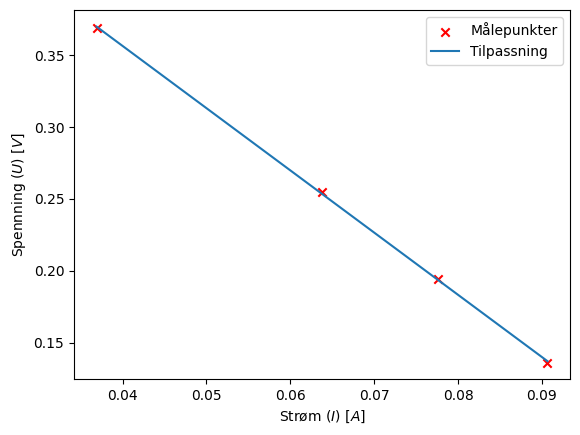


Motstand r = 4.33 Ohm
Motstand emf = 0.53 V


In [8]:
U = np.array([136, 194, 255, 369])*1E-3# V
print(U)
R = np.array([1.5, 2.5, 4, 10])
res3(R, U)

## Oppgave 4
### Oppgave 4.2.1

3.

V = 0.063 mV 

A = 2.0077

R = V/I = - 0,0000315 Ohm 

5. 
Vi halverte strømmen og ser at spenningen er oscilierer mellom 0.032 og 0.031 som gir mening om strømmen halveres. 

Vi halverer strømmen en gang til og ser spennningen fortsatt er halvparten av forrige resultat   

7. 
Når vi bytter voltmeteres koblinger fra P til C får vi nøyaktig samme spenning.  

### 4.2.2

3. 
Vi gjenntar det samme med aluuminium stangen og setter strømen til 2 A. Vi leser av en spenning på .111 mV  

R = V/I =  0.0000555 Ohm

5. 
Vi halverer strømmmen og måler 0.056 mV. Spenningen er halvert akkurat som istad og motstanden er konstant 

7. 
Når vi bytter voltmeteres koblinger fra P til C får vi en spenning på 3.6 mV Hvalverer vi strømmen får vi samme samme resultat som før vi byttet om koblingene. 


## Oppgave 5
### Oppgave 5.1.1

$$
ϵ = - \frac{\mathrm{d} \Phi }{\mathrm{d}t}
$$
Setter inn definisjonen av fluxen
$$
ϵ = - \frac{\mathrm{d}}{\mathrm{d}t} NABcos(ωt)
$$
$$
ϵ = ω NAB sin(ωt)
$$
$$
X = ω NAB 
$$
$$
B = \frac{X}{ωNA}
$$

### Oppgave 5.2.1
8. 
Fra Capstone får vi en sinus kurve på formen  
$$
A \sin \left(\omega t + \phi\right)_{}^{} + C
$$
$$
A = 7.20 \quad ω = 5.08 \quad ϕ = -1.65, \quad C = -5.72
$$

Vi bruker formelen for flux tettheten fra forrige oppgave: 
$$
B = \frac{X}{\omega NA} = \frac{7.20 \times 10^{-3}}{5.08 × 30} = 4.72 × 10^{-5}
$$





Spolen kan brukes som komppass ved å følge med på fluxen når spolen roteres mens den står normalt på bakken. Når den peker mot nord vil fluxen være høyest. 